<a href="https://colab.research.google.com/github/sahanal2603/Data-Science-and-Analytics/blob/master/Linear_Regression_by_Prof_Udit_Bhatia_IIT_Ghandhinagar_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This content is prepared by the resource persons of the TEQIP sponsored FDP conducted by IIT Ghandinagar from 11 to 23 January 2021**

**Linear Regression theory tutorial**

**Gradient Descent with Linear Regression.**

This tutorial is inspired by the following kaggle notebook - https://www.kaggle.com/residentmario/gradient-descent-with-linear-regression

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. [As per wikipedia]

In computer science, linear regression is a general-purpose tool that can be used to "brute force" an optimal solution in a wide range of scenarios, which doesn't have the elegance, closed-form solution, and unfortunate sheer mathematical inpalatability of a statistical solution.

**The algorithm step-by-step**

Given a sequence of points,  yi , and a sequence of points predicted by our model,  y^i , RSS is:

error(m,b)=∑i=1n(yi−yi^) 

Our objective is to minimize this value. Inserting our linear regression model in for the  y^i  predictions, and assuming (for the sake of simplicty) that we're doing regression on only one variable, we get:

RSS=∑i=1n(yi−(mxi+b))2 

Where  b  is the intercept and  m  is the slope of the line of best fit.

Now we need to take the gradient. Since this is an equation of two variables ( b  and  m ) the gradient will consist of two partial derivatives. Hence the gradient is:

⟨∂∂b(RSS),∂∂m(RSS)⟩=⟨−2∑i=1n(yi−(mxi+b)),−2∑i=1nxi(yi−(mxi+b))⟩ 

To solve, take a step in the negative gradient direction every iteration. Eventually we will have something that converges.

Let's implement and test this (note that for the implementation we'll actually use MSE, mean squared error. MSE is just RSS divided by the number of points,  n . We do that because it leads to "nicer" input numbers, as RSS is a really big number).

In [1]:
import numpy as np

# Lets create a function to which we will input our Data (X) and Output (Y)
# This function will do the Gradient Descent for us and return us the optiumum slope.

def gradientDescent(X,Y,learning_rate=0.01,iterations=250):
  # We randomly take a line to start with, our line will be y=mx+b
  b = 6
  m = 4
  n = X.shape[0]
  print("Iteration: {}\tSlope: {}\tIntercept: {}".format(0,m,b))

  for i in range(1,iterations+1):
    # As using mean squared error.
    b_gradient = -2 * np.sum(y - (m*X + b))/n
    m_gradient = -2 * np.sum(X*(y - (m*X + b)))/n
    
    # Updating the previous values
    b = b - (learning_rate * b_gradient)
    m = m - (learning_rate * m_gradient)  

    #print('b=', b, 'm=', m, 'for i = ', i)

    if i%100==0:
      print("Iteration: {}\tSlope: {}\tIntercept: {}".format(i,m,b))

  return m,b

**Creating some synthetic data**
Now that we have prepared our first gradient descent code, lets prepare some synthatic data, upon which we can use our optimizer

In [2]:
np.random.seed(3)
X = np.array(sorted(list(range(5))*10)) + np.random.normal(size=50, scale=0.5)
y = np.array(sorted(list(range(5))*10)) + np.random.normal(size=50, scale=0.25)

**Visualising our synthetic data**

In [3]:
np.array(sorted(list(range(5))*10))+np.random.normal(size=50,scale=0.5)

array([ 0.43714286, -0.64676832, -0.03987047,  0.28224276,  0.61673552,
        0.0744932 , -0.26529107, -0.36526332,  0.32253099,  0.15653019,
        0.74167604,  0.90546417,  0.79190099,  1.36232883,  0.65501966,
        1.24320724,  1.42575948,  1.24312466,  0.58288007,  1.67249623,
        1.66089366,  2.21321754,  1.6233326 ,  1.12794487,  2.11287513,
        2.14351758,  1.96127952,  2.13803425,  1.67579456,  1.63126758,
        2.91595495,  3.9546384 ,  3.40740727,  2.74000412,  3.2793566 ,
        2.76081767,  2.77136961,  3.429642  ,  2.73736768,  2.16218268,
        3.54675265,  4.0442076 ,  4.06400391,  4.62080826,  3.6419871 ,
        4.36573287,  4.21298337,  3.92549311,  4.41792195,  4.24605945])

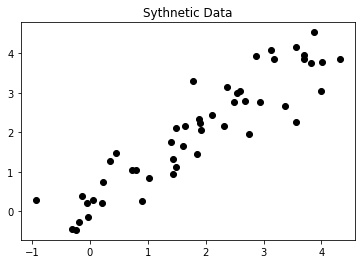

In [4]:
# Matplotlib as a graphing library
import matplotlib.pyplot as plt

# plt.style.use("fivethirtyeight")
plt.scatter(X, y, color='black')
plt.title("Sythnetic Data")
plt.show()

**Running our Optimizer**

Iteration: 0	Slope: 4	Intercept: 6
Iteration: 100	Slope: 0.9171372696881634	Intercept: 0.32137483717618076
Iteration: 200	Slope: 0.9190783062856145	Intercept: 0.31607968297839184
Iteration: 300	Slope: 0.9190808695624981	Intercept: 0.31607269035065455
Iteration: 400	Slope: 0.9190808729474875	Intercept: 0.31607268111639225
Iteration: 500	Slope: 0.9190808729519577	Intercept: 0.3160726811041978
Iteration: 600	Slope: 0.9190808729519635	Intercept: 0.31607268110418185
Iteration: 700	Slope: 0.9190808729519635	Intercept: 0.31607268110418185
Iteration: 800	Slope: 0.9190808729519635	Intercept: 0.31607268110418185
Iteration: 900	Slope: 0.9190808729519635	Intercept: 0.31607268110418185
Iteration: 1000	Slope: 0.9190808729519635	Intercept: 0.31607268110418185


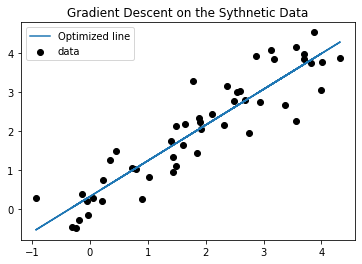

In [5]:
# We run our optimizer that returns the slope and intercept
m, b = gradientDescent(X,y,iterations=1000,learning_rate=0.1)

# getting the final line.
y_hat = m*X + b

# visualizing
plt.scatter(X, y, color='black',label = "data")
plt.plot(X, y_hat,label="Optimized line")
plt.legend()
plt.title("Gradient Descent on the Sythnetic Data")
plt.show()

Do it yourself
Lets prepare one more set of synthetic data, this time, use the regressor function we made above to do get the opitimzed line.

lets take the line as
y=5x+4 
and create synthetic data around it.

**Polynomial regression with sklearn**
Now that we are through with the linear regression, lets try to do a polynomial regresion problem.

inspired by https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

**Creating some synthetic data with polynomials.**

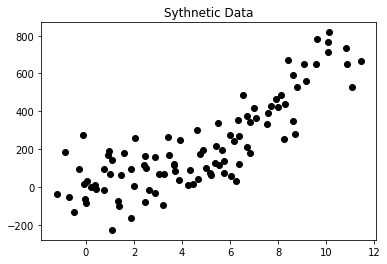

In [6]:
X = np.array(sorted(list(range(10))*10)) + 4*np.random.normal(size=100, scale=0.25)
y = (7*X**2 - 3*X + 4) + (np.random.normal(size=100, scale=10))*10

plt.scatter(X, y, color='black')
plt.title("Sythnetic Data")
plt.show()

**Issues with linear regression?**
Why not try it ourselves?

Iteration: 0	Slope: 4	Intercept: 6
Iteration: 100	Slope: 53.75151359837703	Intercept: -22.98774474163282
Iteration: 200	Slope: 56.409034639093605	Intercept: -41.39841975099549


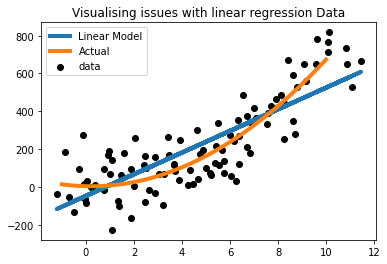

In [7]:
# an attempt to have a linear fit for a quadratic data, that is underfitting
m,b = gradientDescent(X,y)
y_hat = m*X + b

X_data = np.linspace(-1,10,num=100)
y_data = 7*X_data**2 - 3*X_data + 4

plt.scatter(X, y, color='black',label="data")
plt.plot(X,y_hat,label="Linear Model", lw=4)
plt.plot(X_data,y_data,label="Actual", lw=4)
plt.legend()
plt.title("Visualising issues with linear regression Data")
plt.show()

In [8]:
# Another example
#initialize random generator with any seed value (for reproducibility)
rng = np.random.RandomState(seed=1)

#generate 50 random samples from uniform distribution over [0,1]
x = rng.rand(50)

#scale the dataset between 0 to 5
x = x * 5

#create noise containing 50 random samples from standard normal distribution
noise = rng.randn(50)

#add noise to the dataset
y = (3 * x + 4) + noise


Computed slope =  [[4.99746774]]

Computed intercept =  [11.54864712]

Mean Squared Error =  74038.6007389678


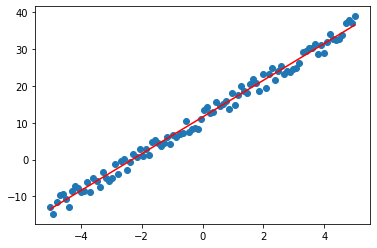

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from 	sklearn.linear_model   	import	 LinearRegression
from sklearn import metrics 
from sklearn.metrics import mean_squared_error

N=100
m=5
b=9
X=np.linspace(-5,5,N)
X=X.reshape(N,1)
noise=np.random.random(size=(N,1))
y=m*X + b + 5*noise

model=LinearRegression()
model.fit(X,y)
model_b = model.intercept_
model_m = model.coef_
mse=mean_squared_error(y,y_hat)


print('\nComputed slope = ', model_m)
print('\nComputed intercept = ', model_b )
print('\nMean Squared Error = ', mse)

y_hat=model_m*X + model_b

plt.scatter(X,y)
plt.plot(X,y_hat, c='r')

# to check from the statistics formula
sum_xy=0
for i in range(N):
    sum_xy=sum_xy + X[i]*y[i]

In [10]:
# to get similar model parameters from the statistics formula
# observe, we can obtain the parameters of linear regression directly from the statistical averages
sum_xy=0
for i in range(N):
    sum_xy=sum_xy + X[i]*y[i]

mew_X=np.mean(X)
mew_y=np.mean(y_hat)
num=(sum_xy/N) - (mew_X)*(mew_y)
den=np.var(X)
our_slope=num/den
our_intercept=mew_y - our_slope * mew_x
print(our_slope)
print(our_intercept)

NameError: ignored

### Is polynomial regression better?

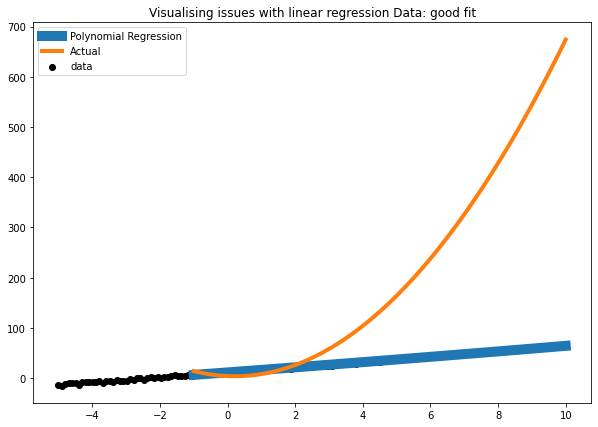

In [11]:
# We import the various important classes from sklearn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression 

# choosing a degree
degree=2

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

# Fitting our model
polyreg.fit(X.reshape(-1, 1),y)

# Increasing graph size
plt.figure(figsize=(10,7))

plt.scatter(X, y, color='black',label="data")
#plt.plot(X,y_hat,label="Linear Model", lw=4)
plt.plot(X_data,polyreg.predict(X_data.reshape(-1, 1)),label="Polynomial Regression", lw=10)
plt.plot(X_data,y_data,label="Actual", lw=4)
plt.legend()
plt.title("Visualising issues with linear regression Data: good fit")
plt.show()

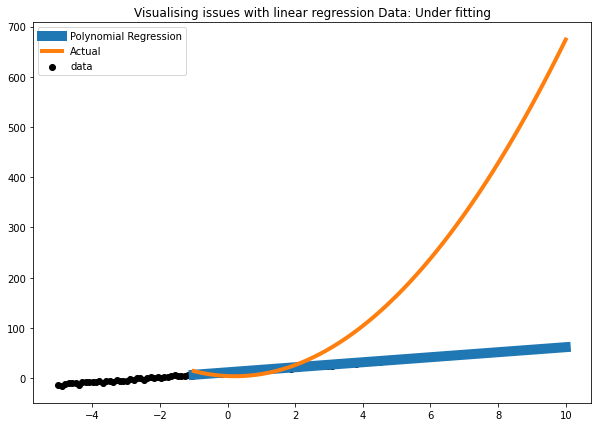

In [12]:

# choosing a degree 1, to demonstrate under-fitting
degree=1

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

# Fitting our model
polyreg.fit(X.reshape(-1, 1),y)

# Increasing graph size
plt.figure(figsize=(10,7))

plt.scatter(X, y, color='black',label="data")
#plt.plot(X,y_hat,label="Linear Model", lw=4)
plt.plot(X_data,polyreg.predict(X_data.reshape(-1, 1)),label="Polynomial Regression", lw=10)
plt.plot(X_data,y_data,label="Actual", lw=4)
plt.legend()
plt.title("Visualising issues with linear regression Data: Under fitting")
plt.show()

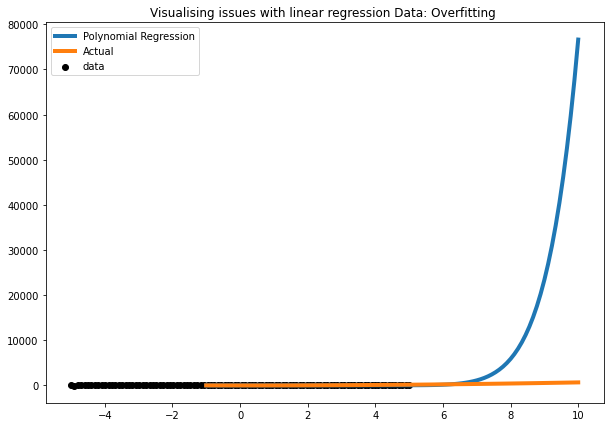

In [13]:
# We import the various important classes from sklearn
# selecting a 10th order polynomial fit for a 2nd order dataset
# to demonstrate overfitting

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression 

# choosing a degree
degree=10

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

# Fitting our model
polyreg.fit(X.reshape(-1, 1),y)

# Increasing graph size
plt.figure(figsize=(10,7))

plt.scatter(X, y, color='black',label="data")
#plt.plot(X,y_hat,label="Linear Model", lw=4)
plt.plot(X_data,polyreg.predict(X_data.reshape(-1, 1)),label="Polynomial Regression", lw=4)
plt.plot(X_data,y_data,label="Actual", lw=4)
plt.legend()
plt.title("Visualising issues with linear regression Data: Overfitting ")
plt.show()

**Lets visualize the results**

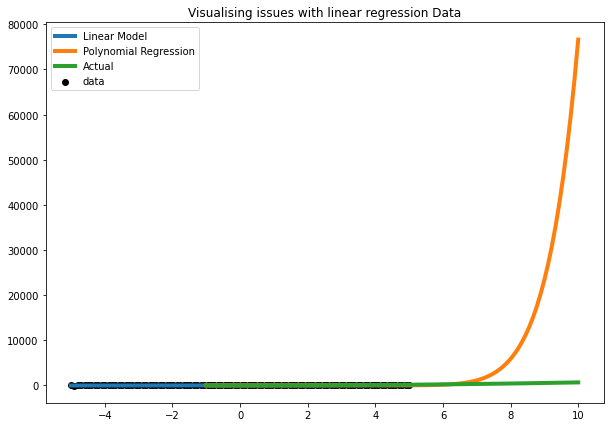

In [14]:
# Same data, with 3rd degree polynomial has a better fit
# observe the almost exact fit the data
# try with higher degree, say 8 or 10 and observe the result, and see the Overfitting 

# Increasing graph size
plt.figure(figsize=(10,7))

plt.scatter(X, y, color='black',label="data")
plt.plot(X,y_hat,label="Linear Model", lw=4)
plt.plot(X_data,polyreg.predict(X_data.reshape(-1, 1)),label="Polynomial Regression", lw=4)
plt.plot(X_data,y_data,label="Actual", lw=4)
plt.legend()
plt.title("Visualising issues with linear regression Data")
plt.show()

Hint: check what different degrees for the polynomial regressor does to our results.
Also check with degree=1, does it make a linear regressor? ;)

# Testing with real world data

## Example for linear regression

Let us look at a salary dataset

In [15]:
!wget -q https://raw.githubusercontent.com/varunjain3/datasets/main/Salary_Data.csv

**Visualizing our dataset**

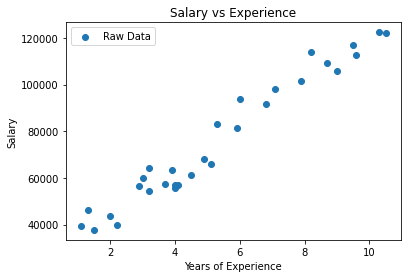

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [16]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Visualizing
plt.scatter(X,y,label="Raw Data")
plt.legend()
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
print(X)

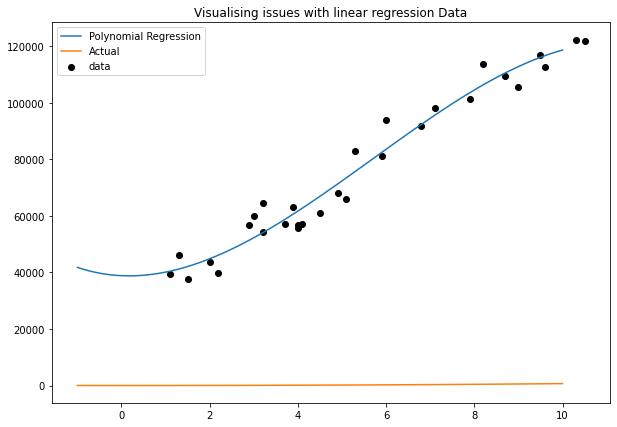

In [17]:
#Now its your turn to fit the data...
# Your turn ....
 #We import the various important classes from sklearn

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
from sklearn.preprocessing import PolynomialFeatures

# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
from sklearn.pipeline import make_pipeline

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression 

# choosing a degree
degree=3

# We create an object of the polynomial regression class.
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

# Fitting our model
polyreg.fit(X.reshape(-1, 1),y)
# Increasing graph size
plt.figure(figsize=(10,7))

plt.scatter(X, y, color='black',label="data")
# plt.plot(X,y_hat,label="Linear Model")
plt.plot(X_data,polyreg.predict(X_data.reshape(-1, 1)),label="Polynomial Regression")
plt.plot(X_data,y_data,label="Actual")
plt.legend()
plt.title("Visualising issues with linear regression Data")
plt.show()

## Example for polynomial regression
Lets download the dataset...

In [18]:
!wget -q https://raw.githubusercontent.com/varunjain3/datasets/main/Position_Salaries.csv

**Visualising the data**

In [19]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [20]:
dataset.shape[1]

2

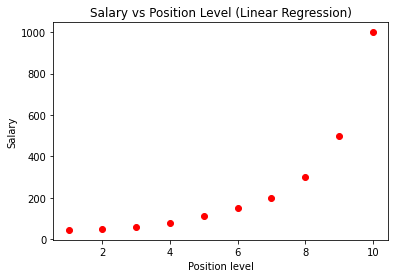

ValueError: ignored

In [21]:
data={'Level':[1,2,3,4,5,6,7,8,9,10],
      'Salary':[45,50,60,80,110,150,200,300,500,1000]}
my_data=pd.DataFrame(data)
X=my_data.Level
y=my_data.Salary
# Visualizing the data
plt.scatter(X, y, color = 'red')
plt.title('Salary vs Position Level (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression 

degree=3

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

polyreg.fit(X,y)

plt.figure(figsize=(10,7))

plt.scatter(X, y, color='black',label="data")
# plt.plot(X,y_hat,label="Linear Model")
plt.plot(X_data,polyreg.predict(X_data.reshape(-1, 1)),label="Polynomial Regression")
plt.plot(X_data,y_data,label="Actual")
plt.legend()
plt.title("Visualising issues with linear regression Data")
plt.show()


In [22]:
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [23]:
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [24]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


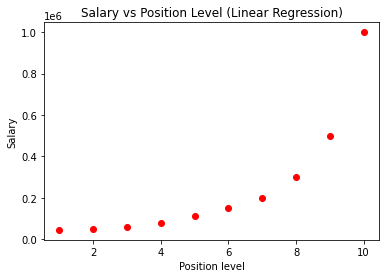

In [25]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Visualizing the data
plt.scatter(X, y, color = 'red')
plt.title('Salary vs Position Level (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

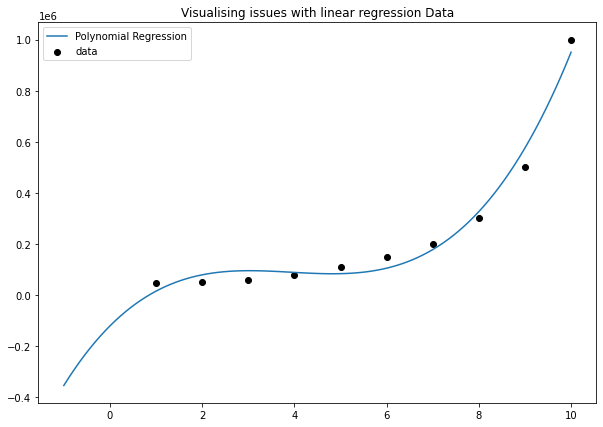

In [26]:
!wget -q https://raw.githubusercontent.com/varunjain3/datasets/main/Position_Salaries.csv
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression 

degree=3

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

polyreg.fit(X.reshape(-1, 1),y)

plt.figure(figsize=(10,7))

plt.scatter(X, y, color='black',label="data")
# plt.plot(X,y_hat,label="Linear Model")
plt.plot(X_data,polyreg.predict(X_data.reshape(-1, 1)),label="Polynomial Regression")
#plt.plot(X_data,y_data,label="Actual")
plt.legend()
plt.title("Visualising issues with linear regression Data")
plt.show()